In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
insurance_data = pd.read_csv("/content/insurance_data.csv")

In [ ]:
insurance_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0.0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0.0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0.0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0.0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN,NaN
10225,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN,NaN
10226,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN,NaN
10227,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN,NaN


In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         10229 non-null  object 
 1   YearOfObservation   10229 non-null  int64  
 2   Insured_Period      10229 non-null  float64
 3   Residential         10229 non-null  int64  
 4   Building_Painted    10229 non-null  object 
 5   Building_Fenced     10229 non-null  object 
 6   Garden              10218 non-null  object 
 7   Settlement          10229 non-null  object 
 8   Building Dimension  10110 non-null  float64
 9   Building_Type       10229 non-null  int64  
 10  Date_of_Occupancy   8993 non-null   float64
 11  NumberOfWindows     10229 non-null  object 
 12  Geo_Code            10114 non-null  object 
 13  Claim               7160 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
insurance_data.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                  11
Settlement               0
Building Dimension     119
Building_Type            0
Date_of_Occupancy     1236
NumberOfWindows          0
Geo_Code               115
Claim                 3069
dtype: int64

**Data Preprocessing**

In [ ]:
insurance_data.sort_values("Customer Id", inplace = True)
insurance_data.drop_duplicates(subset ="Customer Id",keep = False, inplace = True)
insurance_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
8220,H0,2013,0.350685,0,V,V,V,U,384.0,2,1980.0,.,26362,NaN
7875,H10000,2013,1.000000,0,V,V,V,U,580.0,2,1960.0,.,13205,NaN
7669,H10001,2013,1.000000,0,V,N,O,R,852.0,1,1994.0,3,13004,NaN
8012,H10002,2013,1.000000,0,V,N,O,R,380.0,2,1960.0,3,13208,NaN
8013,H10003,2015,1.000000,0,V,N,O,R,380.0,2,1960.0,3,13208,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,H9987,2014,1.000000,0,V,V,V,U,300.0,2,NaN,.,13001,NaN
7667,H9988,2012,1.000000,0,V,V,V,U,200.0,2,1960.0,.,13001,NaN
8748,H9994,2013,1.000000,1,V,N,O,R,797.0,2,1990.0,4,57209,NaN
8096,H9996,2012,1.000000,1,V,V,V,U,960.0,2,1960.0,.,13214,NaN


In [ ]:
insurance_data['Date_of_Occupancy'] = insurance_data['Date_of_Occupancy'].replace(np.nan,0)

In [ ]:
insurance_data['Building Dimension'] = insurance_data['Building Dimension'].replace(np.nan,0)

In [ ]:
insurance_data['Garden'] = insurance_data['Garden'].fillna('O')

In [ ]:
insurance_data['Claim'] = insurance_data['Claim'].replace(np.nan,0)

In [ ]:
insurance_data['Building_Painted'] = insurance_data['Building_Painted'].replace({'N': 'Painted', 'V': 'Not Painted'})

In [ ]:
insurance_data['Building_Fenced'] = insurance_data['Building_Fenced'].replace({'N': 'Fenced', 'V': 'Not Fenced'})

In [ ]:
insurance_data['Garden'] = insurance_data['Garden'].replace({'V': 'Has garden', 'O': 'No garden'})

In [ ]:
insurance_data['Settlement'] = insurance_data['Settlement'].replace({'R': 'rural area', 'U': 'urban area'})

In [ ]:
# converting 'Date of occupancy' from float to int
insurance_data['Date_of_Occupancy'] = insurance_data['Date_of_Occupancy'].astype(int)

In [ ]:
# converting 'Building Dimension' from float to int
insurance_data['Building Dimension'] = insurance_data['Building Dimension'].astype(int)

In [ ]:
#remove dot from the column
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
insurance_data['NumberOfWindows'] = insurance_data['NumberOfWindows'].apply(remove_punctuation)

In [ ]:
insurance_data.to_csv("/content/insurance_cleandata.csv")

In [ ]:
insurance_clean = pd.read_csv("/content/insurance_cleandata.csv")

In [ ]:
insurance_clean.head()

,Unnamed: 0,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,8220,H0,2013,0.350685,0,Not Painted,Not Fenced,Has garden,urban area,384,2,1980,,26362,0.0
1,7875,H10000,2013,1.000000,0,Not Painted,Not Fenced,Has garden,urban area,580,2,1960,,13205,0.0
2,7669,H10001,2013,1.000000,0,Not Painted,Fenced,No garden,rural area,852,1,1994,3,13004,0.0
3,8012,H10002,2013,1.000000,0,Not Painted,Fenced,No garden,rural area,380,2,1960,3,13208,0.0
4,8013,H10003,2015,1.000000,0,Not Painted,Fenced,No garden,rural area,380,2,1960,3,13208,0.0


**Data Visulization**

In [ ]:
insurance_data['Date_of_Occupancy'].to_csv("/content/insurance_occupancy.csv")

In [ ]:
insurance_occupancy = pd.read_csv("/content/insurance_occupancy.csv")

In [ ]:
insurance_occupancy= insurance_occupancy[insurance_occupancy['Date_of_Occupancy'] != 0]

In [ ]:
import plotly.express as px
date_histogram = px.histogram(insurance_occupancy, x='Date_of_Occupancy')
date_histogram.show()

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inputdata, colorstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colorstoplot), figsize=(25,5))
    fig.suptitle('Bar charts of: '+ str(colorstoplot))

    for colName, plotNumber in zip(colorstoplot, range(len(colorstoplot))):
        inputdata.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

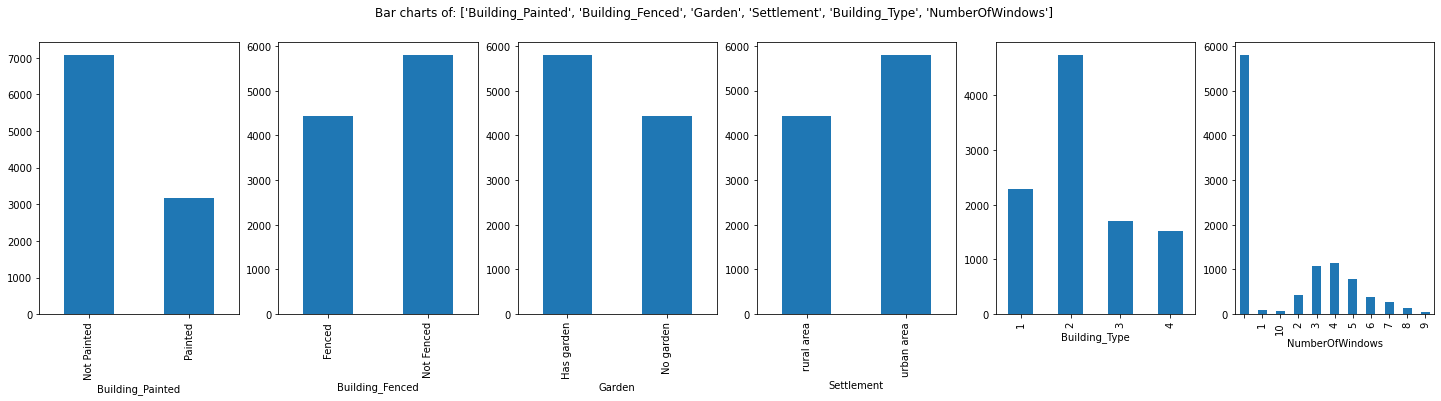

In [ ]:
# Calling the function
PlotBarCharts(inputdata=insurance_clean, colorstoplot=[
    'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement','Building_Type','NumberOfWindows'])

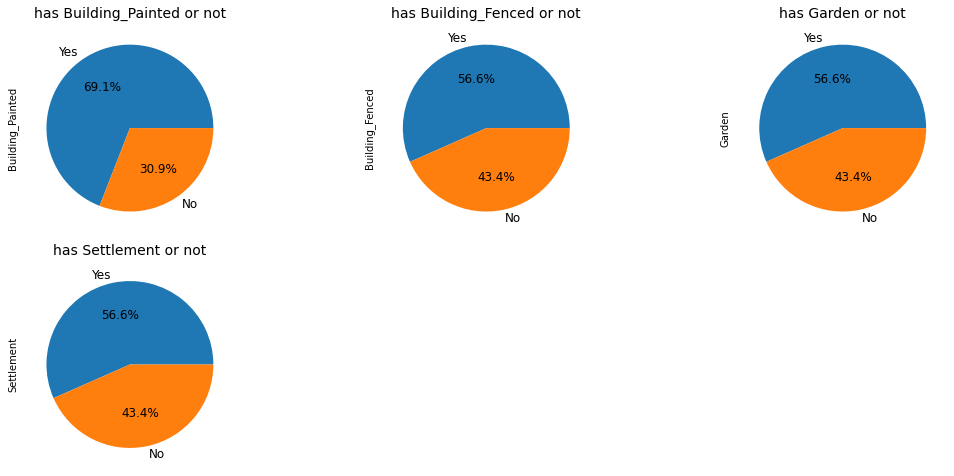

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
varible_list=['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
varible_label=['Yes','No']
for value in varible_list:
  plt.subplot(rows,col,count)
  insurance_clean[value].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=varible_label)
  plt.title(f'has {value} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

array([[<AxesSubplot:title={'center':'YearOfObservation'}>,
        <AxesSubplot:title={'center':'Insured_Period'}>],
       [<AxesSubplot:title={'center':'Residential'}>, <AxesSubplot:>]],
      dtype=object)

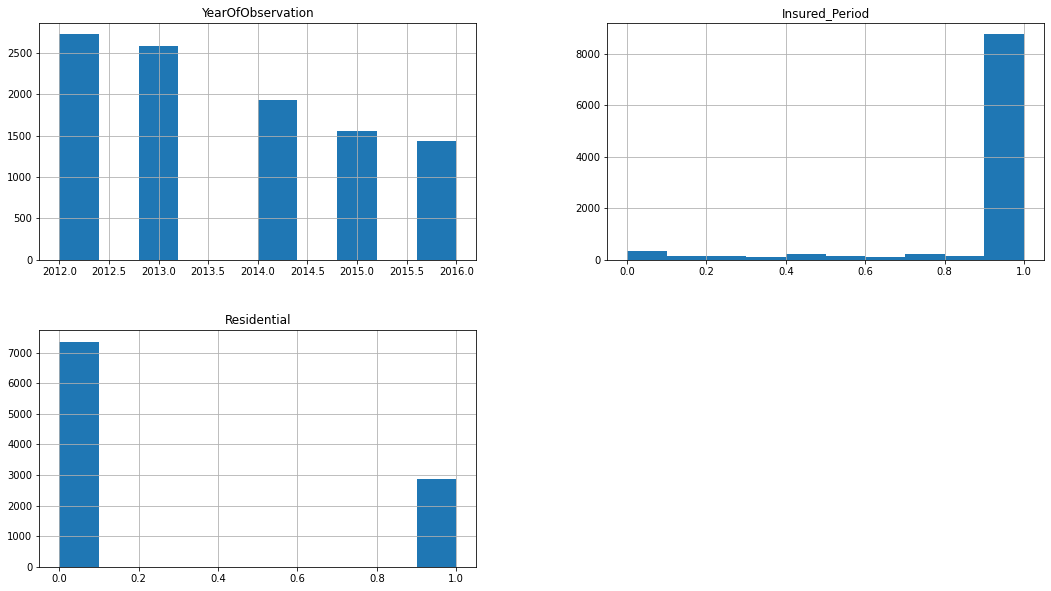

In [ ]:
# Plotting histograms of multiple columns together
insurance_clean.hist(['YearOfObservation', 'Insured_Period', 
          'Residential'], figsize=(18,10))

In [ ]:
insurance_clean['Building_Painted'] = insurance_clean['Building_Painted'].replace({'Painted': '1', 'Not Painted': '0'})

In [ ]:
insurance_clean['Building_Fenced'] = insurance_clean['Building_Fenced'].replace({'Fenced': '1', 'Not Fenced': '0'})

In [ ]:
insurance_clean['Garden'] = insurance_clean['Garden'].replace({'Has garden': '1', 'No garden': '0'})

In [ ]:
insurance_clean['Settlement'] = insurance_clean['Settlement'].replace({'rural area': '0', 'urban area': '1'})

In [ ]:
UselessColumns = ['Unnamed: 0']
insurance_clean = insurance_clean.drop(UselessColumns,axis=1)

In [ ]:
insurance_clean.to_csv("/content/insurance_cleandata2.csv")

In [ ]:
insurance_clean2 = pd.read_csv("/content/insurance_cleandata2.csv")

In [ ]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Unnamed: 0']
insurance_clean2 = insurance_clean2.drop(UselessColumns,axis=1)

In [ ]:
# generating pairwise correlation
correlation = insurance_clean2.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
correlation.style.background_gradient(cmap ='coolwarm')

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.026359,-0.049702,-0.065390,0.111619,-0.111523,-0.111428,0.015370,0.000373,0.044791,-0.005963
Insured_Period,0.026359,1.000000,-0.056036,-0.008973,0.055583,-0.055654,-0.055148,0.009676,-0.029292,0.136027,0.065642
Residential,-0.049702,-0.056036,1.000000,0.074817,0.058768,-0.058643,-0.058957,0.029087,0.289646,-0.074826,0.075829
Building_Painted,-0.065390,-0.008973,0.074817,1.000000,-0.581748,0.581865,0.581981,-0.083187,0.118364,-0.208744,-0.079828
Building_Fenced,0.111619,0.055583,0.058768,-0.581748,1.000000,-0.999801,-0.999602,0.129773,-0.004354,0.315403,0.103499
Garden,-0.111523,-0.055654,-0.058643,0.581865,-0.999801,1.000000,0.999801,-0.129744,0.004402,-0.315471,-0.103949
Settlement,-0.111428,-0.055148,-0.058957,0.581981,-0.999602,0.999801,1.000000,-0.129584,0.004451,-0.314931,-0.103860
Building Dimension,0.015370,0.009676,0.029087,-0.083187,0.129773,-0.129744,-0.129584,1.000000,0.025471,0.101648,0.248546
Building_Type,0.000373,-0.029292,0.289646,0.118364,-0.004354,0.004402,0.004451,0.025471,1.000000,-0.180950,0.064391
Date_of_Occupancy,0.044791,0.136027,-0.074826,-0.208744,0.315403,-0.315471,-0.314931,0.101648,-0.180950,1.000000,0.078462


**AUC model**

In [ ]:
#Name of the columns/Variables
insurance_clean2.columns

Index(['Unnamed: 0', 'Customer Id', 'YearOfObservation', 'Insured_Period',
       'Residential', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'Building Dimension', 'Building_Type',
       'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
#Building and training a Logistic Regression model
import statsmodels.formula.api as sm
logistic_varible = sm.logit(formula='Claim~+Insured_Period+Residential+Building_Painted+Building_Fenced+Garden+Settlement+Building_Type+Date_of_Occupancy', data=insurance_clean2)
fitted_logit = logistic_varible.fit()
fitted_logit.summary()

         Current function value: 0.424911
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Claim   No. Observations:                10229
Model:                          Logit   Df Residuals:                    10220
Method:                           MLE   Df Model:                            8
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                 0.03263
Time:                        22:29:44   Log-Likelihood:                -4346.4
converged:                      False   LL-Null:                       -4493.0
Covariance Type:            nonrobust   LLR p-value:                 1.168e-58
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.4094    179.059      0.047      0.963    -342.539     359.358
Insured_Period        0.9131      0.151      6.052      0.000       0.617       1.209
Residential           0.3907      0.061      6.395      0.000       0.271       0.510
Building_Painted     -0.3361      0.081     -4.162      0.000      -0.494      -0.178
Building_Fenced     -11.8667    179.058     -0.066      0.947    -362.815     339.081
Garden              -26.0470   4020.582     -0.006      0.995   -7906.243    7854.149
Settlement           13.9469   4016.593      0.003      0.997   -7858.430    7886.324
Building_Type         0.1814      0.030      6.125      0.000       0.123       0.239
Date_of_Occupancy     0.0003   5.83e-05      5.993      0.000       0.000       0.000
=====================================================================================
"""

In [ ]:
#predicting values
predicted_values_claims=fitted_logit.predict(insurance_clean2[["Insured_Period"]+['Residential']+['Building_Painted']+['Building_Fenced']+['Garden']+['Settlement']+['Building_Type']+['Date_of_Occupancy']])
predicted_values_claims[1:10229]

1        0.150592
2        0.158944
3        0.182930
4        0.182930
5        0.113844
           ...   
10224    0.082052
10225    0.150592
10226    0.250600
10227    0.207635
10228    0.150273
Length: 10228, dtype: float64

In [ ]:
print(predicted_values_claims.to_string())

0        8.981550e-02
1        1.505923e-01
2        1.589444e-01
3        1.829298e-01
4        1.829298e-01
5        1.138442e-01
6        8.205243e-02
7        1.505923e-01
8        1.012605e-01
9        1.829298e-01
10       1.242118e-01
11       1.505923e-01
12       1.288323e-01
13       2.440856e-01
14       1.505923e-01
15       1.502734e-01
16       1.505923e-01
17       9.678908e-02
18       1.834526e-01
19       1.505923e-01
20       1.502734e-01
21       8.205243e-02
22       1.505923e-01
23       1.505923e-01
24       1.837071e-01
25       1.505923e-01
26       1.505923e-01
27       8.205243e-02
28       1.829298e-01
29       1.824081e-01
30       6.938715e-02
31       5.820739e-02
32       1.592249e-01
33       1.227802e-01
34       8.891416e-02
35       1.793025e-01
36       8.205243e-02
37       1.505923e-01
38       1.829298e-01
39       1.829298e-01
40       7.389548e-02
41       1.834526e-01
42       1.834526e-01
43       1.505923e-01
44       1.299343e-01
45       1

In [ ]:
#save values to the file
with open('predicted_claims.csv', 'w') as f:
    for values in predicted_values_claims:
        f.write(f"{values}\n")

In [ ]:
#Converting predicted values into classes using threshold
threshold=0.8

predicted_class_insurance=np.zeros(predicted_values_claims.shape)
predicted_class_insurance[predicted_values_claims>threshold]=1
predicted_class_insurance

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#save values to the file
with open('predicted_claimvalues.csv', 'w') as f:
    for values in predicted_class_insurance:
        f.write(f"{values}\n")

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

confu_matrix = confusion_matrix(insurance_clean2[['Claim']],predicted_class_insurance)
print('Confusion Matrix : \n', confu_matrix)

total_value=sum(sum(confu_matrix))
#from confusion matrix calculate accuracy
accuracy=(confu_matrix[0,0]+confu_matrix[1,1])/total_value
print ('Accuracy : ', accuracy)

sensitivity = confu_matrix[0,0]/(confu_matrix[0,0]+confu_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = confu_matrix[1,1]/(confu_matrix[1,0]+confu_matrix[1,1])
print('Specificity : ', specificity)

Confusion Matrix : 
 [[8595    0]
 [1633    1]]
Accuracy :  0.8403558510118291
Sensitivity :  1.0
Specificity :  0.0006119951040391676


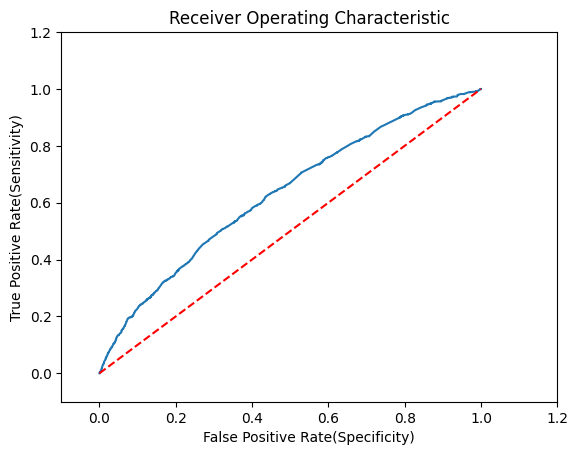

In [ ]:
#for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

actual_value_claim = insurance_clean2[['Claim']]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual_value_claim, predicted_values_claims)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [ ]:
thresholds

array([1.99996881e+00, 9.99968809e-01, 3.26214241e-01, ...,
       2.49882893e-02, 2.09303594e-02, 6.19846690e-08])

In [ ]:
#Area under Curve
roc_auc_claim = auc(false_positive_rate, true_positive_rate)
roc_auc_claim

0.6305188322891322

**Split Train and Test**

In [ ]:
#define the predictor variables and the response variable
X = insurance_clean2[['Residential', 'Building_Fenced','Building_Painted','Garden','Settlement','Building_Type','Date_of_Occupancy']]
y = insurance_clean2['Claim']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 


**Logistic Regression**

In [ ]:
#instantiate the model
logistic_regression_insurance = LogisticRegression()

#fit the model using the training data
logistic_regression_insurance.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_prediction_logistic_regression_insurance = logistic_regression_insurance.predict(X_test)
print('Accuracy: {:.2f}'.format(logistic_regression_insurance.score(X_test, y_test)))

Accuracy: 0.84


**Gaussian Naive Bayes**



In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_predict_probaility_insurance = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_probaility_insurance))

Accuracy: 0.7494297816878462


**XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

y_preds_xg = xg_reg.predict(X_test)

[17:57:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse_xg = np.sqrt(mean_squared_error(y_test, y_preds_xg))
print("RMSE: %f" % (rmse_xg))

RMSE: 0.385347


In [ ]:
# fit model no training data
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred_xg_accur = xg_model.predict(X_test)
xg_predictions = [round(value) for value in y_pred_xg_accur]

In [ ]:
# evaluate predictions
xg_accuracy = accuracy_score(y_test, xg_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.55%
